# Libraries import 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Data Preprocessing 

In [32]:
# Load the dataset
file_path = 'world-happiness-report.csv'
data = pd.read_csv(file_path)

# Step 1: Categorize 'Ladder score' into Low, Medium, High
data['Happiness Level'] = pd.cut(
    data['Life Ladder'],  # Source column for binning
    bins=[0, 4, 6, 10],  # Define bins: Low (0-4), Medium (4-6), High (6-10)
    labels=['Low', 'Medium', 'High']  # Labels for bins
)

# Step 2: Drop irrelevant or unnecessary columns
drop_columns = [
    'Country name', 
    'Life Ladder',  # Dropped after creating 'Happiness Level'
    'Positive affect',
    'Negative affect',
]
data = data.drop(columns=drop_columns)

# Step 3: Handle missing values
# Drop rows with missing values (optional: you could use imputation if necessary)
data = data.dropna()

# Step 4: Encode the target variable
label_encoder = LabelEncoder()
data['Happiness Level'] = label_encoder.fit_transform(data['Happiness Level'])

# Step 5: Split data into features (X) and target (y)
X = data.drop(columns=['Happiness Level'])  # Features
y = data['Happiness Level']                # Target

# Step 6: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


# Exploratory Data Analysis 

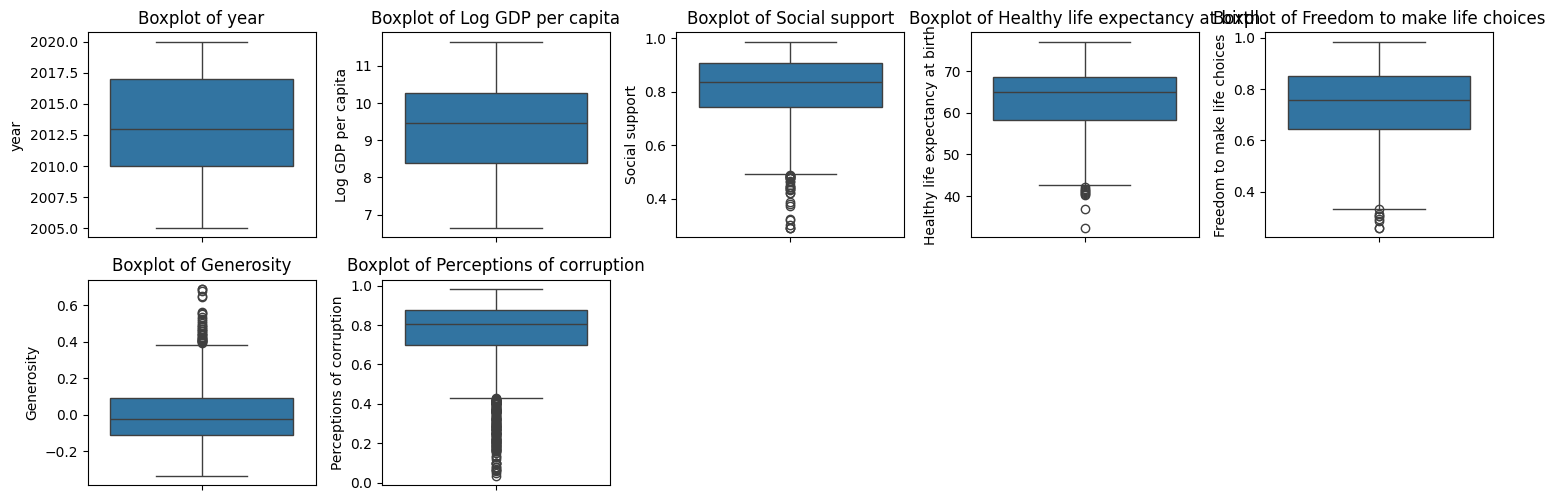

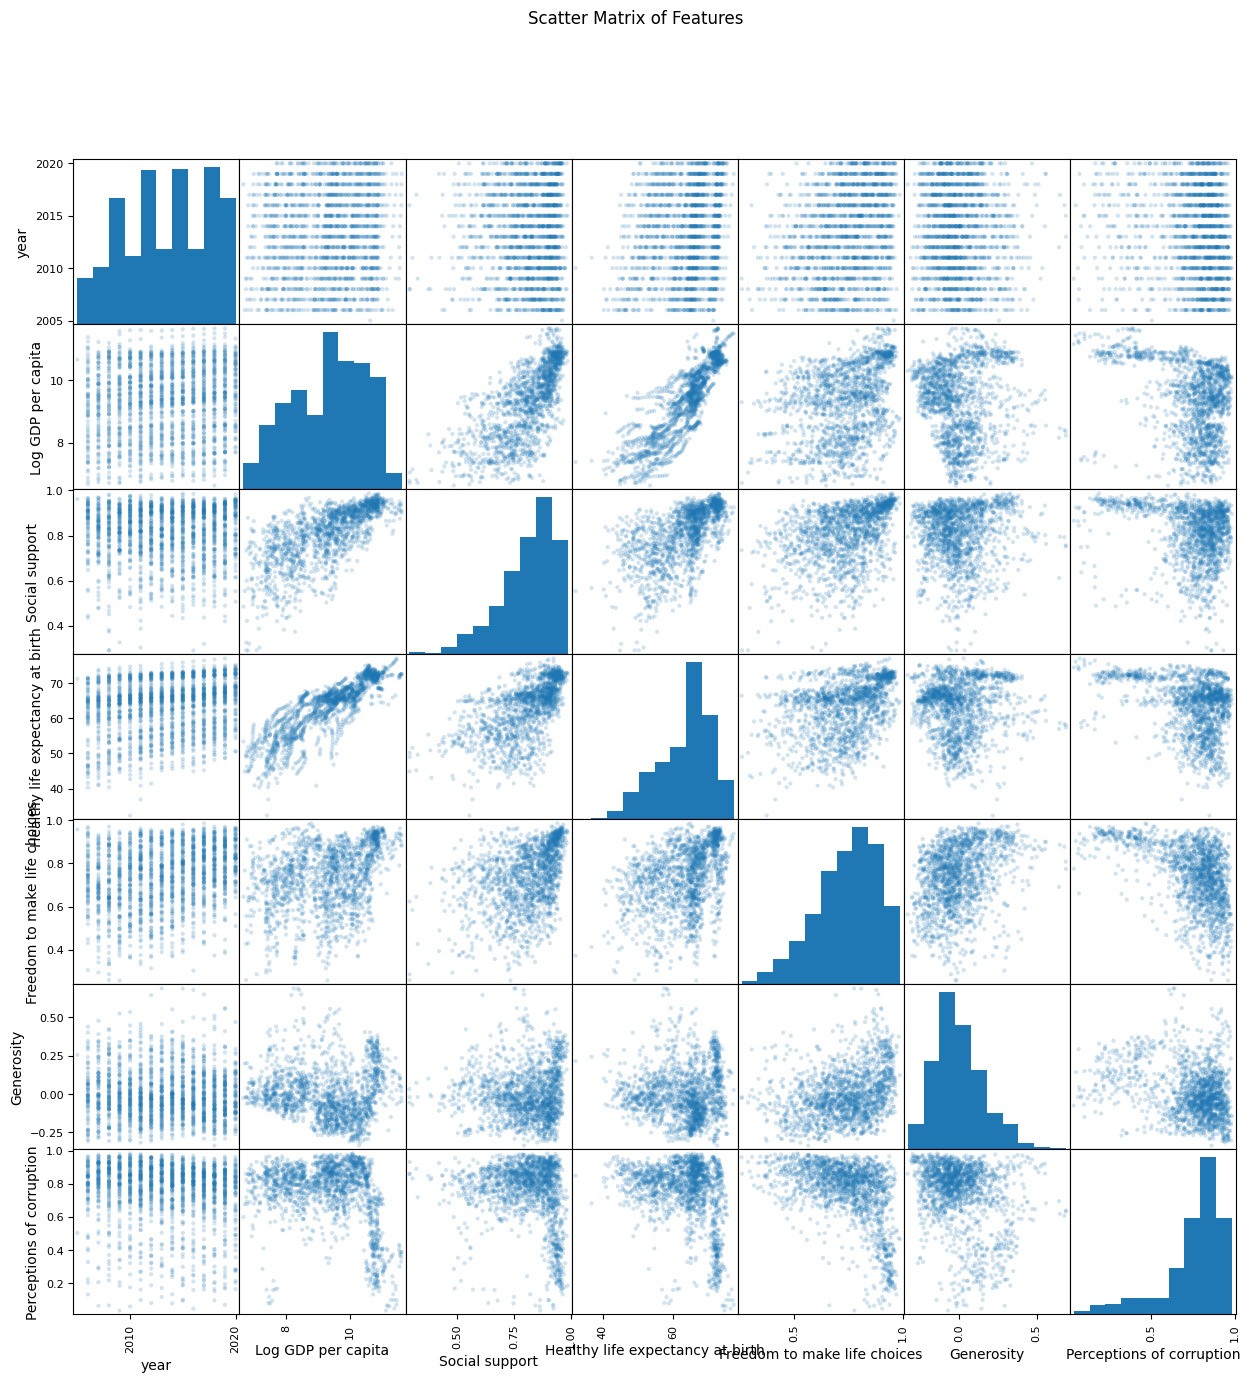

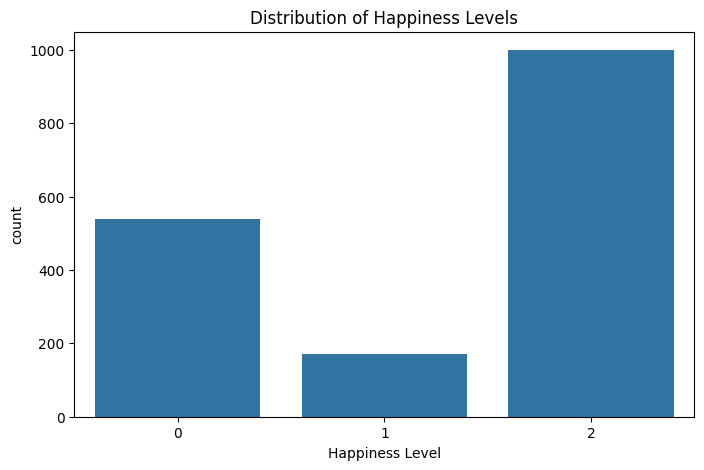

In [33]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

scatter_matrix(
    pd.DataFrame(X, columns=data.drop(columns=['Happiness Level']).columns),
    figsize=(15, 15),
    diagonal='hist',
    alpha=0.2
)
plt.suptitle('Scatter Matrix of Features')
plt.show()

# Bar chart for target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=data['Happiness Level'])
plt.title('Distribution of Happiness Levels')
plt.show()


# Random Forest Classifier & Decision Tree Classifier

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       164
           1       0.78      0.31      0.44        58
           2       0.80      0.92      0.86       292

    accuracy                           0.82       514
   macro avg       0.82      0.69      0.72       514
weighted avg       0.82      0.82      0.81       514

Accuracy: 0.8229571984435797
Confusion Matrix:
[[135   0  29]
 [  0  18  40]
 [ 17   5 270]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       164
           1       0.57      0.45      0.50        58
           2       0.80      0.83      0.81       292

    accuracy                           0.79       514
   macro avg       0.73      0.70      0.71       514
weighted avg       0.78      0.79      0.78       514

Accuracy: 0.7859922178988327
Confusion Matrix:
[[137   0  27]
 [  0  2

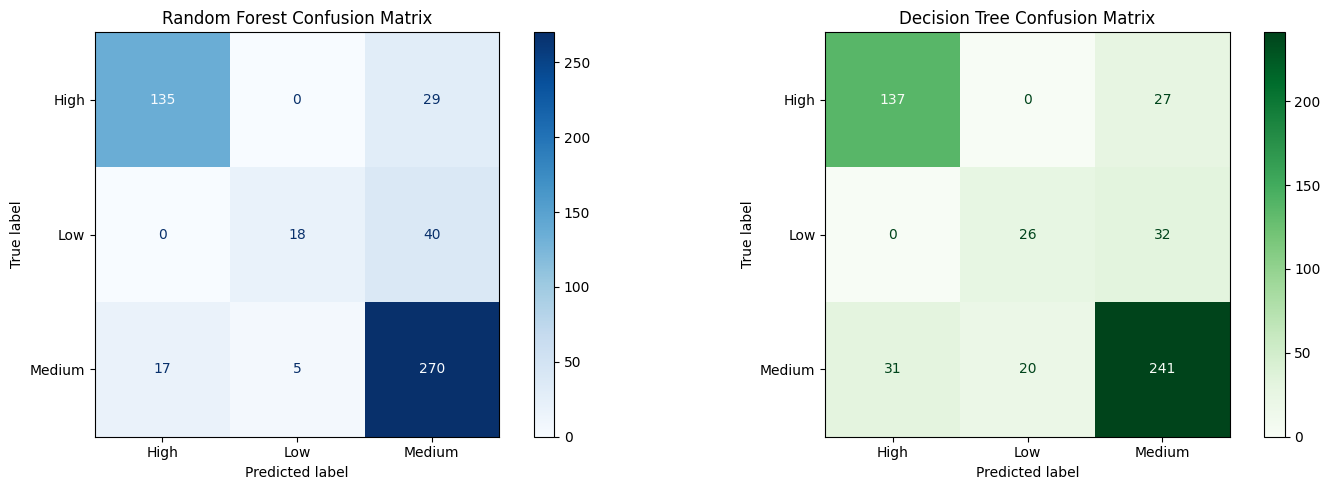

In [34]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_y_pred))

from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, rf_y_pred, ax=axes[0], cmap='Blues', display_labels=label_encoder.classes_
)
axes[0].set_title('Random Forest Confusion Matrix')

# Decision Tree Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, dt_y_pred, ax=axes[1], cmap='Greens', display_labels=label_encoder.classes_
)
axes[1].set_title('Decision Tree Confusion Matrix')

plt.tight_layout()
plt.show()



# Comparison

In [35]:
# Comparison
rf_accuracy = accuracy_score(y_test, rf_y_pred)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

print("Model Comparison:")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

if rf_accuracy > dt_accuracy:
    print("\nThe Random Forest model is more accurate.")
elif rf_accuracy < dt_accuracy:
    print("\nThe Decision Tree model is more accurate.")
else:
    print("\nBoth models have the same accuracy.")

Model Comparison:
Random Forest Accuracy: 0.82
Decision Tree Accuracy: 0.79

The Random Forest model is more accurate.


# Hyperparameter Tuning


In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best Random Forest Score:", rf_grid_search.best_score_)

Best Random Forest Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Score: 0.8338772663877266


In [37]:
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform Grid Search
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)
print("Best Decision Tree Score:", dt_grid_search.best_score_)

Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Decision Tree Score: 0.774602510460251
